<a href="https://colab.research.google.com/github/arjunpurwar/Machine_Learnng/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


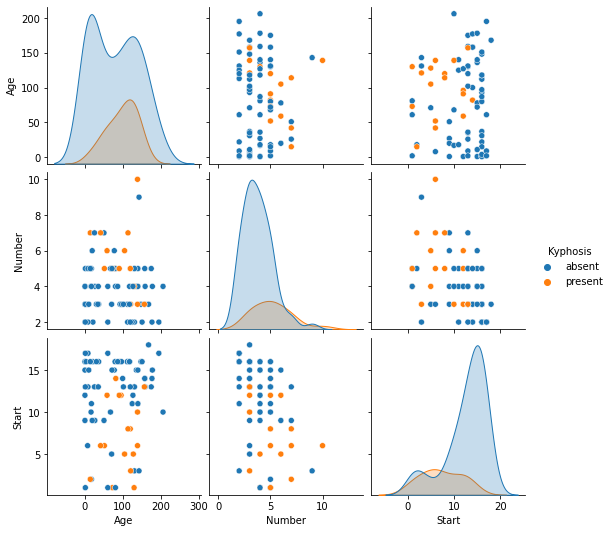

In [7]:
sns.pairplot(df, hue= 'Kyphosis')

#Train test split

In [8]:
from sklearn.model_selection import train_test_split

In [18]:
X=df.drop('Kyphosis', axis=1)
y= df['Kyphosis']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier(criterion='entropy')

In [22]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

#Prediction

In [23]:
predictions = dtree.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.78      0.74      0.76        19
     present       0.29      0.33      0.31         6

    accuracy                           0.64        25
   macro avg       0.53      0.54      0.53        25
weighted avg       0.66      0.64      0.65        25



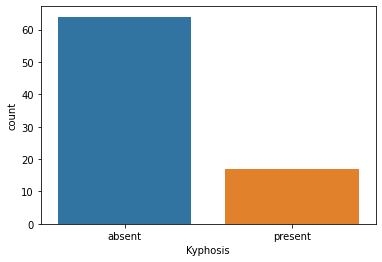

In [26]:
sns.countplot(data= df, x= 'Kyphosis')

In [27]:
print(confusion_matrix(y_test, predictions))

[[14  5]
 [ 4  2]]


In [28]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
from six import StringIO
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [30]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, feature_names = features,filled = True)

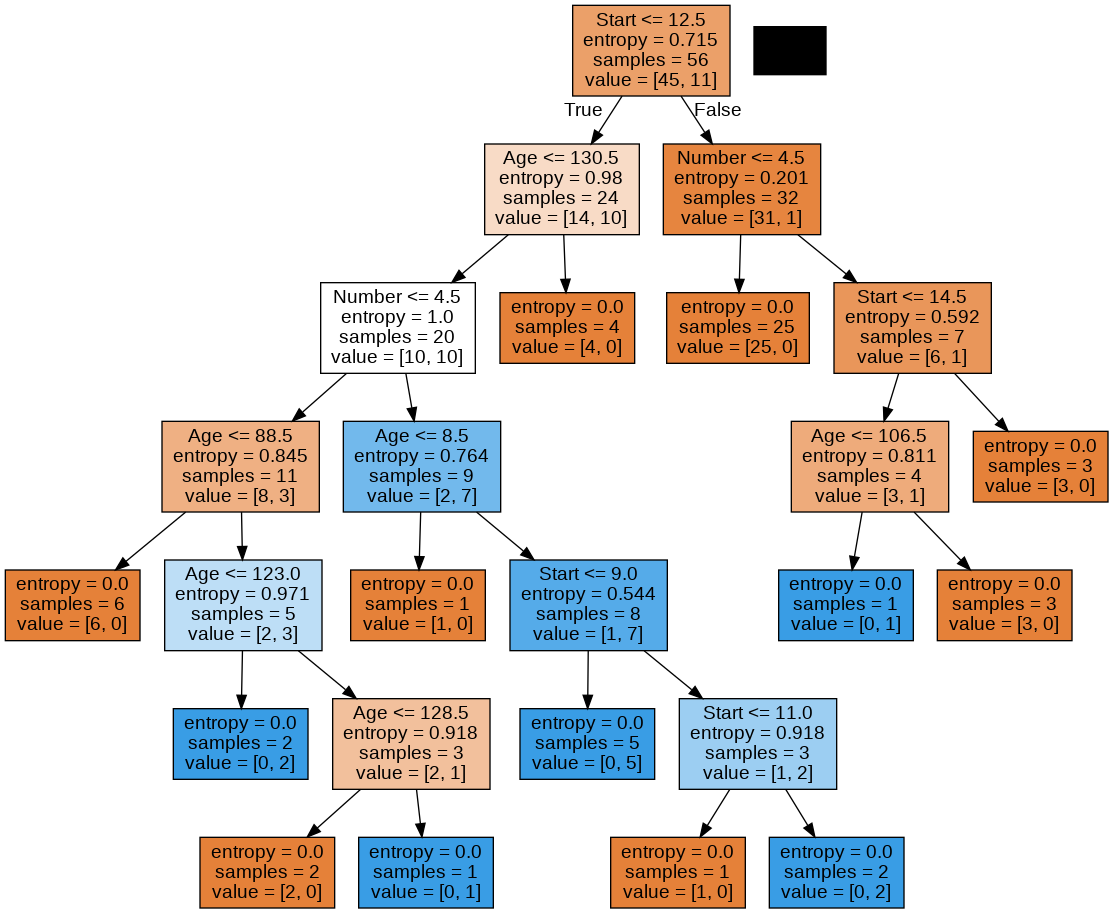

In [31]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy')

In [34]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [35]:
rfc_pred = rfc.predict(X_test)

In [36]:
print(confusion_matrix(y_test, rfc_pred))

[[17  2]
 [ 4  2]]


In [37]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.81      0.89      0.85        19
     present       0.50      0.33      0.40         6

    accuracy                           0.76        25
   macro avg       0.65      0.61      0.62        25
weighted avg       0.74      0.76      0.74        25

